In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import  train_test_split

C:\Users\v-inkris\AppData\Local\Continuum\Anaconda2\envs\python3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.left.value_counts()
## Imbalanced data set

0    11428
1     3571
Name: left, dtype: int64

In [7]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [8]:
## 
sns.set(rc={'figure.figsize':(11.7,8.27)})


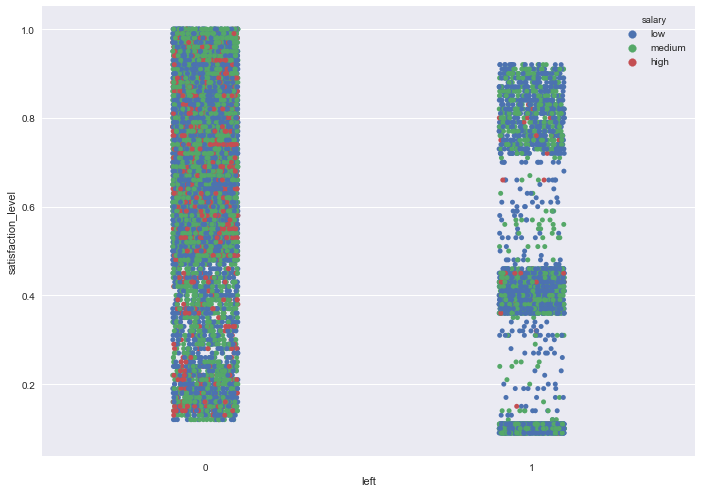

In [9]:
sns.stripplot(x = 'left',y ='satisfaction_level' , data = df, jitter= True , hue='salary')
plt.show()

In [10]:
df_left = df[df.left == 1]
df_remain = df[df.left == 0]
print( 'Percentage with high salary in the left category :' ,(df_left.salary=='high').sum()/df_left.shape[0] )
print( 'Percentage with medium salary in the left category :' ,(df_left.salary=='medium').sum()/df_left.shape[0] )
print( 'Percentage with low salary in the left category :' ,(df_left.salary=='low').sum()/df_left.shape[0] )

print( 'Percentage with high salary in the remaining category :' ,(df_remain.salary=='high').sum()/df_remain.shape[0] )
print( 'Percentage with medium salary in the remaining category :' ,(df_remain.salary=='medium').sum()/df_remain.shape[0] )

Percentage with high salary in the left category : 0.0229627555307
Percentage with medium salary in the left category : 0.368804256511
Percentage with low salary in the left category : 0.608232987959
Percentage with high salary in the remaining category : 0.101067553378
Percentage with medium salary in the remaining category : 0.448809940497


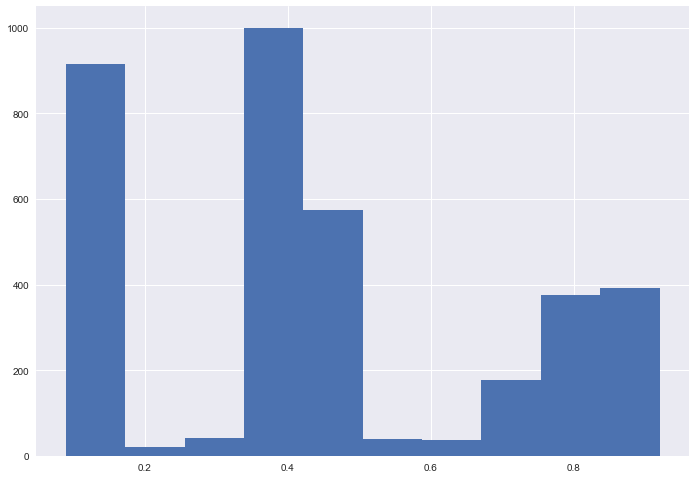

In [11]:
df_left.satisfaction_level.hist()
plt.show()

In [ ]:
## Analysis of Work Accidents 

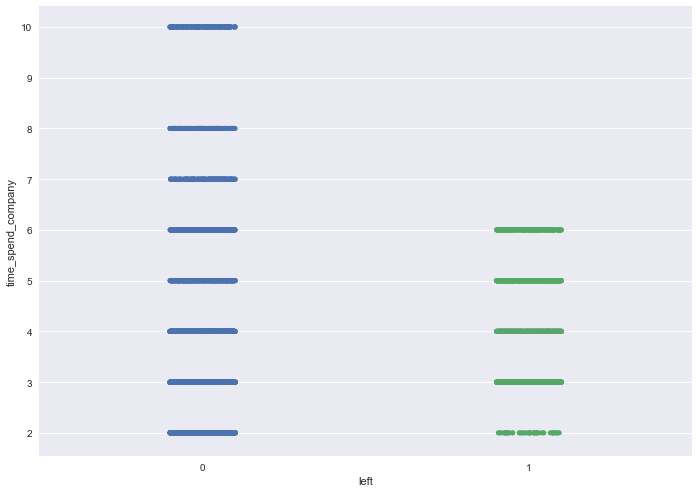

In [12]:
sns.stripplot(x = 'left',y ='time_spend_company' , data = df, jitter= True )
plt.show()

## People who have stayed longer in the company tend to stick ?

In [13]:
df_corr  =df [['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']].corr()

In [14]:
df_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


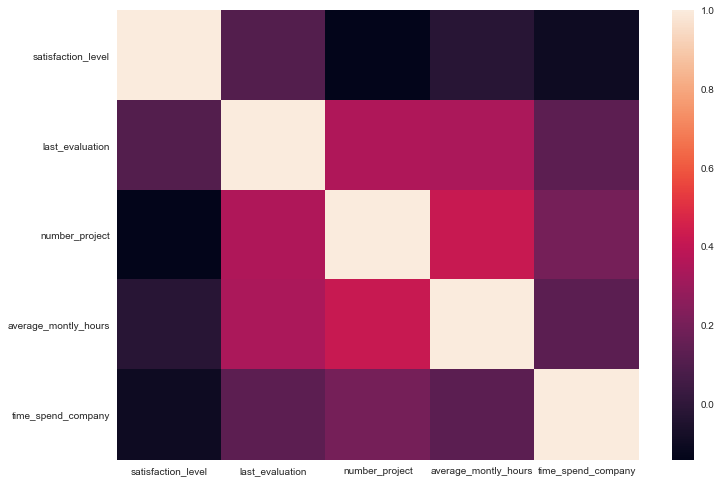

In [15]:
sns.heatmap(df_corr,);
plt.show()

In [ ]:
## Number of hours spent vs left

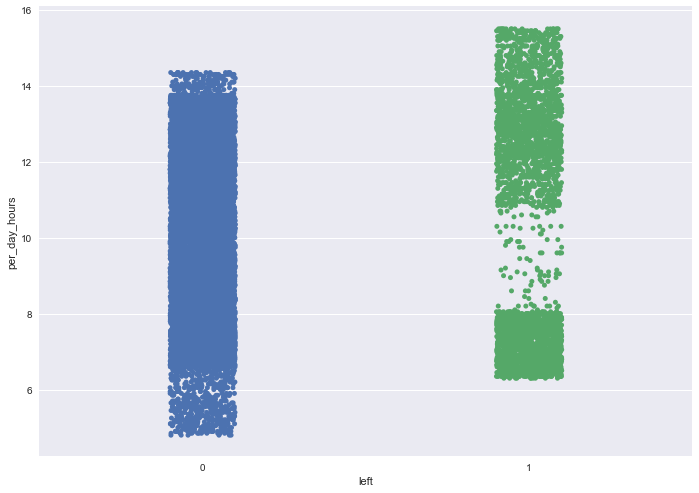

In [16]:
df['per_day_hours'] = df['average_montly_hours']/20
sns.stripplot(x = 'left',y ='per_day_hours' , data = df, jitter= True )
plt.show()
## Average hours spent per day in more by people who have left, could notice period policy  be the reason?  

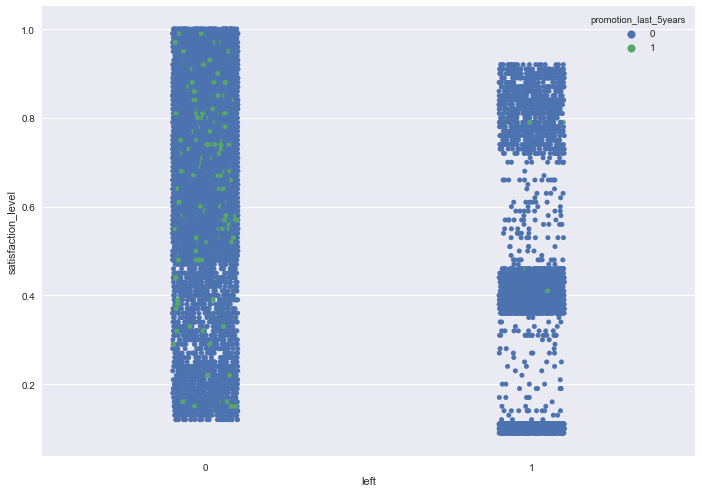

In [17]:
df['per_day_hours'] = df['average_montly_hours']/20
sns.stripplot(x = 'left',y ='satisfaction_level' , data = df, jitter= True, hue = 'promotion_last_5years' )
plt.show()

In [18]:
(df_left['promotion_last_5years'] == 0).sum() 

3552

In [19]:
(df_left['promotion_last_5years'] == 1 ). sum()

19

In [20]:
len(df_left['promotion_last_5years'])

3571

In [21]:
print('Percentage who did not a promotion of the people who left ',1 - (df_left['promotion_last_5years'] == 1 ). sum() / len(df_left['promotion_last_5years']))

Percentage who did not a promotion of the people who left  0.994679361523


In [22]:
print((df_remain['promotion_last_5years'] == 1).sum() )
print( (df_remain['promotion_last_5years'] == 0). sum())
len(df_remain['promotion_last_5years'])

300
11128


11428

In [23]:
300/11428

0.026251312565628283

In [24]:
len(df_remain)

11428

In [25]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold


In [26]:
## Using logistic regression with over-sampling 

In [27]:
##Upsampling minority class
#df_majority = df[input.Target==0]
#df_minority = input[input.Target==1]
df_up = resample(df_left, replace=True,n_samples=11428,random_state=123) 
df_oversampled = pd.concat([df_remain, df_up])
df_oversampled.left.value_counts()

1    11428
0    11428
Name: left, dtype: int64

In [28]:
y = df_oversampled.left
X = df_oversampled.drop(['left'],axis = 1 )

In [29]:
X = pd.get_dummies(X, columns=['sales','salary'])

In [30]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score

In [33]:
c_values=[0.001,0.005,0.01,0.15,1.0]

In [34]:
for c in c_values:
    folds = KFold(len(X_train),10)
    print("C = ",c)
    recall_sum = accuracy_sum= 0
    precision_sum =0 
    for iteration,indices in enumerate(folds,start =1 ):
        #print( np.isnan(y_train.iloc[indices[1]]).any() )
        model = LogisticRegression(C=c, penalty='l1')
        op = model.fit(X_train.iloc[indices[0]],   y_train.iloc[indices[0]])
        predicted = model.predict(X_train.iloc[indices[1]])                        
        recall = recall_score(y_pred=predicted , y_true=y_train.iloc[indices[1]])
        precision = precision_score(y_pred=predicted , y_true=y_train.iloc[indices[1]])
        accuracy = accuracy_score(y_pred=predicted , y_true=y_train.iloc[indices[1]])
        recall_sum += recall
        precision_sum += precision
        accuracy_sum += accuracy        
    print("Average Recall :",recall_sum/10)
    print("Average Precision : ", precision_sum/10)
    print("Average Accuracy : ", accuracy_sum/10)
    

C =  0.001
Average Recall : 0.999623588457
Average Precision :  0.502627306495
Average Accuracy :  0.503887968921
C =  0.005
Average Recall : 0.786840745251
Average Precision :  0.760679482699
Average Accuracy :  0.769215286174
C =  0.01
Average Recall : 0.800485528312
Average Precision :  0.761398872503
Average Accuracy :  0.774308887005
C =  0.15
Average Recall : 0.799298778886
Average Precision :  0.762189157024
Average Accuracy :  0.774438838419
C =  1.0
Average Recall : 0.799833780833
Average Precision :  0.762133304958
Average Accuracy :  0.774569599896


In [38]:
from sklearn.svm import SVC
c_values=[0.001,0.005,0.01,0.15,1.0,1.5,2.0]

In [36]:
for c in c_values:
    folds = KFold(len(X_train),10)
    print("C = ",c)
    recall_sum = accuracy_sum= 0
    precision_sum =0 
    for iteration,indices in enumerate(folds,start =1 ):
        #print( np.isnan(y_train.iloc[indices[1]]).any() )
        model = SVC(C = c,kernel='rbf')
        op = model.fit(X_train.iloc[indices[0]],   y_train.iloc[indices[0]])
        predicted = model.predict(X_train.iloc[indices[1]])                        
        recall = recall_score(y_pred=predicted , y_true=y_train.iloc[indices[1]])
        precision = precision_score(y_pred=predicted , y_true=y_train.iloc[indices[1]])
        accuracy = accuracy_score(y_pred=predicted , y_true=y_train.iloc[indices[1]])
        recall_sum += recall
        precision_sum += precision
        accuracy_sum += accuracy        
    print("Average Recall :",recall_sum/10)
    print("Average Precision : ", precision_sum/10)
    print("Average Accuracy : ", accuracy_sum/10)

C =  0.001


C:\Users\v-inkris\AppData\Local\Continuum\Anaconda2\envs\python3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Average Recall : 0.7
Average Precision :  0.346017296158
Average Accuracy :  0.490889928424
C =  0.005
Average Recall : 0.864348869117
Average Precision :  0.746066838121
Average Accuracy :  0.784564006187
C =  0.01
Average Recall : 0.871773693714
Average Precision :  0.788708894984
Average Accuracy :  0.818717309631
C =  0.15
Average Recall : 0.936359439574
Average Precision :  0.918604240481
Average Accuracy :  0.926598854313
C =  1.0
Average Recall : 0.944819270552
Average Precision :  0.940482256725
Average Accuracy :  0.942401636842


In [37]:
## c = 2.0 selected with rbf

C =  1.5
Average Recall : 0.949900811947
Average Precision :  0.945401701633
Average Accuracy :  0.947429920887
C =  2.0
Average Recall : 0.95263684861
Average Precision :  0.94789593978
Average Accuracy :  0.950042123358


In [ ]:
## Takes too much time !
for c in c_values:
    folds = KFold(len(X_train),10)
    print("C = ",c)
    recall_sum = accuracy_sum= 0
    precision_sum =0 
    for iteration,indices in enumerate(folds,start =1 ):
        #print( np.isnan(y_train.iloc[indices[1]]).any() )
        model = SVC(C = c,kernel='linear')
        op = model.fit(X_train.iloc[indices[0]],   y_train.iloc[indices[0]])
        predicted = model.predict(X_train.iloc[indices[1]])                        
        recall = recall_score(y_pred=predicted , y_true=y_train.iloc[indices[1]])
        precision = precision_score(y_pred=predicted , y_true=y_train.iloc[indices[1]])
        accuracy = accuracy_score(y_pred=predicted , y_true=y_train.iloc[indices[1]])
        recall_sum += recall
        precision_sum += precision
        accuracy_sum += accuracy        
    print("Average Recall :",recall_sum/10)
    print("Average Precision : ", precision_sum/10)
    print("Average Accuracy : ", accuracy_sum/10)

C =  0.001
Average Recall : 0.947778925274
Average Precision :  0.72878754071
Average Accuracy :  0.797035078355
C =  0.005
Average Recall : 0.916434224772
Average Precision :  0.745583647592
Average Accuracy :  0.801475809766
C =  0.01
Average Recall : 0.893680752963
Average Precision :  0.750560466363
Average Accuracy :  0.797883770228
C =  0.15
Average Recall : 0.862091690884
Average Precision :  0.755381203011
Average Accuracy :  0.791026999879
C =  1.0
